In [1]:
!pip install kaggle

In [2]:
!kaggle competitions download -c playground-series-s4e9


  0%|          | 0.00/7.84M [00:00<?, ?B/s]
 13%|#2        | 1.00M/7.84M [00:01<00:10, 684kB/s]
 26%|##5       | 2.00M/7.84M [00:01<00:04, 1.37MB/s]
 38%|###8      | 3.00M/7.84M [00:01<00:02, 2.20MB/s]
 64%|######3   | 5.00M/7.84M [00:02<00:00, 4.14MB/s]
 89%|########9 | 7.00M/7.84M [00:02<00:00, 6.16MB/s]
100%|##########| 7.84M/7.84M [00:02<00:00, 3.66MB/s]


In [7]:
import zipfile
zip_file_path = 'playground-series-s4e9.zip'
extract_to = 'data/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [1]:
import os
files = os.listdir(extract_to)
print("Files:", files)

NameError: name 'extract_to' is not defined

In [2]:
import pandas as pd
train_path = os.path.join(extract_to,'train.csv')
df = pd.read_csv(train_path)

NameError: name 'extract_to' is not defined

In [4]:
import os
train_path = 'data/train.csv'

In [5]:
import pandas as pd
df = pd.read_csv(train_path)

In [6]:
import numpy as np
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
# preprocess the data
# use existing decision tree from scikit learn
# implement the decision tree from scratch


In [7]:
df['clean_title'] = df['clean_title'].fillna("No")

In [8]:
df1 = df.dropna()

In [9]:
df1 = df1.drop(['id'],axis=1)

In [10]:
df1.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor

y = df1['price']
X = df1.drop(['price'], axis=1)

In [12]:
X.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes


In [13]:
y.head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [14]:
X.shape, y.shape

((181067, 11), (181067,))

In [15]:
regressor = DecisionTreeRegressor(random_state = 42, max_depth = 11)

In [16]:
test_path = 'data/test.csv'
df_test = pd.read_csv(test_path)

In [17]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [18]:
X['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
cat_cols = X.select_dtypes(['object']).columns

In [20]:
cat_cols

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

In [21]:
for cat in cat_cols:
    X[cat] = X[cat].astype('category')

In [22]:
 X[cat_cols] = X[cat_cols].apply(lambda x: x.cat.codes)

In [23]:
X.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,31,494,2007,213000,2,112,38,312,71,1,1
1,28,927,2002,143250,2,360,38,263,10,0,1
2,9,1570,2002,136731,1,633,38,38,71,1,1
3,16,756,2017,19500,2,855,49,29,14,1,1
4,36,1074,2021,7388,2,254,23,29,10,1,1


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [25]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [26]:
predicted = regressor.predict(X_test)
predicted

array([16871.91726251, 13536.98590381, 16640.83953681, ...,
       19868.28240451,  9592.97777778, 11662.5172209 ])

In [27]:
print(regressor.score(X_test, y_test))

-0.2872353402248402


In [28]:
df_test

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes


In [29]:
X_final = df_test.drop(['id'],axis=1)

In [30]:
for cat in cat_cols:
    X_final[cat] = X_final[cat].astype('category')
X_final[cat_cols] = X_final[cat_cols].apply(lambda x: x.cat.codes)

In [31]:
final_pred = regressor.predict(X_final)

In [32]:
submission_df = pd.DataFrame()
submission_df['id'] = df_test['id']
submission_df['price'] = final_pred

In [33]:
submission_df.head()

,id,price
0,188533,199998.000000
1,188534,88842.866295
2,188535,47297.825702
3,188536,22603.099379
4,188537,30678.596033


In [63]:
submission_df.to_csv('first.csv', header=True, index=False)

In [64]:
submission_df.shape

(125690, 2)

In [34]:
# make a program which takes input gender and age and outputs the weight using 
# 1. if gender == Female, output 50
# 2. if gender == Male, check if Age >= 20 then 70 else 55

class Node():
    def __init__(self, feature_name = None, threshold = None, left = None, right = None, value = None):
        # for decision node
        self.feature_name = feature_name
        self.threshold = threshold
        self.left= left
        self.right = right

        # for leaf node
        self.value = value


# 0 for female and 1 for male
def buildTree():
    tree = Node("gender", threshold = 1)
    tree.left = Node(value = 50)
    tree.right = Node("age",threshold = 20)
    tree.right.left = Node(value = 55)
    tree.right.right = Node(value = 70)
    return tree

tree = buildTree()
def traverse(tree,features,i):
    if tree.value != None:
        return tree.value
    else:
        if tree.threshold > features[i]:
            return traverse(tree.left,features,i)
        else:
            return traverse(tree.right,features,i+1)
    
def check(gender,age):
    if gender == "Male":
        gender = 1
    else:
        gender = 0
    features = [gender,age]
    print(traverse(tree,features,0))
    



In [35]:
check("Male",18)
check("Male",20)
check("Male",55)
check("Female",20)
check("Female",18)

55
70
70
50
50


In [117]:
# to types of nodes in the tree : decision node and value node

class Tree():
    def __init__(self,feature_idx = None,threshold = None,left = None,right = None,value = None):
        # for decision node
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right

        # for value node
        self.value = value

class DecisionTreeRegressor2():
    def __init__(self, max_depth = 2, min_sample_nodes = 2, criteria = "rmse"):
        self.root = None #initializing the tree
        self.max_depth = max_depth  #maximum allowed depth of the decision tree 
        self.min_sample_nodes = min_sample_nodes # if a node has equal or less than this number of datapoints, it will not split further
        self.criteria = criteria # criteria to choose the best split for the given dataset - rootMeanSquareError or varianceReduction

    def fit(self,X,y):
        x = X.values
        Y = y.values.reshape(-1,1)
        dataset = np.concatenate((x,Y),axis = 1)
        self.root = self.build_tree(dataset)

    def build_tree(self,dataset,cur_depth=0):
        X = dataset[:,:-1]
        y = dataset[:,-1]
        num_rows, num_features = X.shape
        if num_rows > self.min_sample_nodes and cur_depth < self.max_depth:
            best_split = self.get_best_split(dataset,num_features)
            if best_split['score'] > 0:  # as error is always positive or zero, if it is zero we don't need to do splitting further
                left_tree = self.build_tree(best_split['left_tree'],cur_depth+1)
                right_tree = self.build_tree(best_split['right_tree'],cur_depth+1)
                return Tree(best_split['feature_idx'],best_split['threshold'],left_tree,right_tree)
        # Now we have a value node
        value1 = np.mean(y)
        return Tree(value = value1)

    def get_best_split(self,dataset,num_features):
        best_split = {}
        score = 0
        y = dataset[:,-1]
        if self.criteria == "rmse":
            score = float("inf")
        else:
            score = -float("inf")
            
        for feature_idx in range(num_features):
            feature_values = dataset[:,feature_idx]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left,dataset_right = self.get_split(dataset,feature_idx,threshold)
                
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y_left = dataset_left[:,-1]
                    y_right = dataset_right[:,-1]
                    cur_score = self.get_score(y,y_left,y_right)

                    if self.criteria == "rmse":
                        if cur_score < score:
                            best_split['feature_idx'] = feature_idx
                            best_split['threshold'] = threshold
                            best_split['left_tree'] = dataset_left
                            best_split['right_tree'] = dataset_right
                            best_split['score'] = cur_score
                            score = cur_score
                    else:
                        if cur_score > score:
                            best_split['feature_idx'] = feature_idx
                            best_split['threshold'] = threshold
                            best_split['left_tree'] = dataset_left
                            best_split['right_tree'] = dataset_right
                            best_split['score'] = cur_score
                            score = cur_score
        return best_split

    def get_split(self,dataset,feature_idx,threshold):
        dataset_left = np.array([row for row in dataset if row[feature_idx]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_idx]>threshold])
        return dataset_left, dataset_right

    def get_score(self,y,y_left,y_right):
        if self.criteria == "rmse":
            mean_left = sum(y_left)/len(y_left)
            mean_right = sum(y_right)/len(y_right)
            rmse_left = (sum([(val-mean_left)**2 for val in y_left])/len(y_left))**0.5
            rmse_right = (sum([(val-mean_right)**2 for val in y_right])/len(y_right))**0.5
            return rmse_left+rmse_right
        else:
            weight_left = len(y_left) / len(y)
            weight_right = len(y_right) / len(y)
            reduction = np.var(y) - (weight_left * np.var(y_left) + weight_right * np.var(y_right))
            return reduction

    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_idx]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
        

In [118]:
regressor2 = DecisionTreeRegressor2(max_depth = 10)

In [83]:
df_ex = pd.read_csv('data/example_data.csv')
X = df_ex.drop(['weight'], axis=1)
X["gender"] = X["gender"].astype("category")
X["gender"] = X["gender"].cat.codes
y = df_ex["weight"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [119]:
regressor2.fit(X_train,y_train)

In [120]:
y_pred = regressor2.predict(X_test)

In [122]:
Y_test = y_test.values 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, y_pred))

24.980534088232247

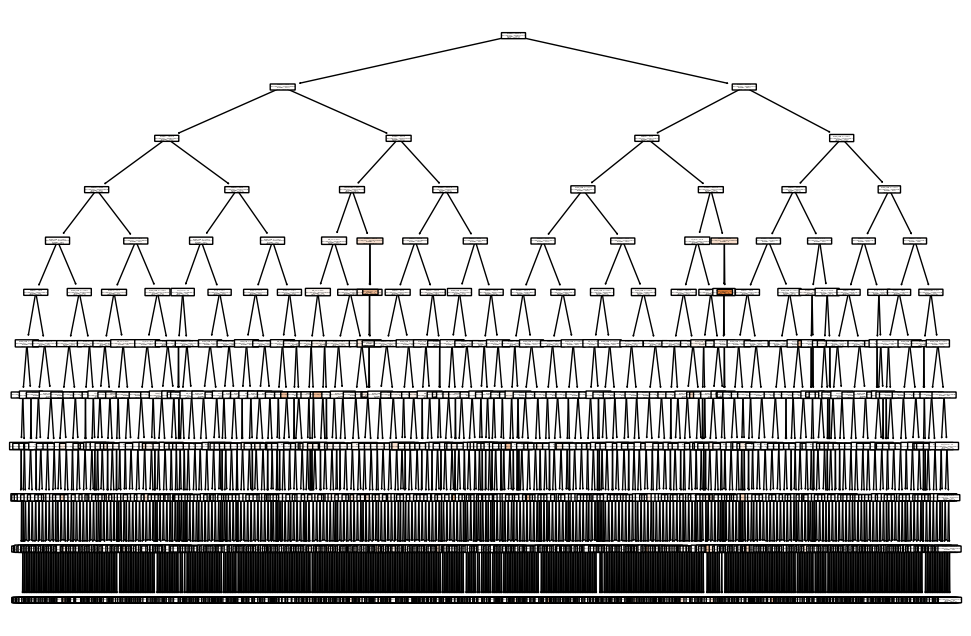

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(
    regressor,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    precision=2,
)
plt.show()

In [42]:
from sklearn.tree import export_text
# Export the tree to text
tree_rules = export_text(regressor, feature_names=X.columns)
print(tree_rules)

|--- milage <= 35427.50
|   |--- engine <= 749.00
|   |   |--- milage <= 15514.50
|   |   |   |--- engine <= 478.50
|   |   |   |   |--- model_year <= 2019.50
|   |   |   |   |   |--- engine <= 160.50
|   |   |   |   |   |   |--- model_year <= 2013.50
|   |   |   |   |   |   |   |--- engine <= 26.50
|   |   |   |   |   |   |   |   |--- ext_col <= 146.00
|   |   |   |   |   |   |   |   |   |--- value: [10199.00]
|   |   |   |   |   |   |   |   |--- ext_col >  146.00
|   |   |   |   |   |   |   |   |   |--- int_col <= 66.00
|   |   |   |   |   |   |   |   |   |   |--- value: [41599.00]
|   |   |   |   |   |   |   |   |   |--- int_col >  66.00
|   |   |   |   |   |   |   |   |   |   |--- value: [43640.00]
|   |   |   |   |   |   |   |--- engine >  26.50
|   |   |   |   |   |   |   |   |--- milage <= 1257.00
|   |   |   |   |   |   |   |   |   |--- engine <= 137.50
|   |   |   |   |   |   |   |   |   |   |--- model <= 1268.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [22999.5

In [45]:
regressionUT = DecisionTreeRegressorUT(max_depth = 11)


In [46]:
X2 = X_train.values
Y2 = y_train.values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X2, Y2, test_size=.2, random_state=41)

In [48]:
regressionUT.fit(X_train,y_train)
regressionUT.print_tree()

KeyboardInterrupt: 

In [204]:
Y_pred = regressionUT.predict(X_test) 
Y_pred

[49.0, 88.0, 51.625, 51.625, 51.625, 88.0, 51.625, 88.0, 51.625, 88.0]

In [205]:
Y_test

array([[58],
       [66],
       [53],
       [45],
       [50],
       [78],
       [58],
       [85],
       [51],
       [71]], dtype=int64)